# Contact
Created by: Ania Supady <p/>
Date:       10/2022 <p/>
>www.linkedin.com/in/aniasupady <p/>
>ania.b.supady@gmail.com



--------------------------------------------------------------------------------


# Introduction

The purpose of this Google Colab is to answer the coding question below:

 Task 1

>   a)	Please follow this link (https://www.db-fiddle.com/f/fufVxMKne1xMNHCbFoANMo/0) and fork the dataset. Provide rolling three day average.



>   b)	Using this dataset, show the SQL query to find the rolling 3 day average transaction amount for each day in January 2021.


Task 2

>   a)	What approach would you take to building a strategy to prevent account takeover fraud? Please list examples of data you would use, what treatments you would apply, and key metrics you would monitor.


# Establish libraries

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import os
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

# Get the data

I used the link provided in the job posting: https://www.db-fiddle.com/f/gbWgmGwNFVGcM6GAN4YMB4/0 and:
1. Forked the data
2. Run this command to execute the table:
    
    
    "select *
    from transactions;"

3. Since data is managable in size, I just moved it to excel

4. Loaded the data into Google Colab, using Google Sheets

In [ ]:
import gdown
!ls #to verify content

drive  Ramp.xlsx  sample_data


In [ ]:
import gdown
url = 'https://drive.google.com/uc?id=1qN7hxIXd3HpKet0FVc2jstofeRSkCS-k'
out_path = 'Ramp.xlsx'
gdown.download(url, out_path, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1qN7hxIXd3HpKet0FVc2jstofeRSkCS-k
To: /content/Ramp.xlsx
100%|██████████| 17.3k/17.3k [00:00<00:00, 18.9MB/s]


'Ramp.xlsx'

In [ ]:
#I created "datecalc" variable inside google sheets using forllowing formula: =DATEVALUE(LEFT(A2,10)), but I will recreate it in python later
import pandas as pd
Ramp_2 = pd.read_excel('Ramp.xlsx')
Ramp_2.head(10)

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,transaction_time,transaction_amount,datecalc
0,2021-01-16T00:05:54.000Z,25.05,2021-01-16
1,2021-01-07T20:53:04.000Z,124.00,2021-01-07
2,2021-01-18T22:55:37.000Z,66.58,2021-01-18
3,2021-01-21T00:36:57.000Z,9.99,2021-01-21
4,2021-01-19T06:31:10.000Z,22.27,2021-01-19
5,2021-01-10T01:24:04.000Z,576.76,2021-01-10
6,2021-01-04T00:07:27.000Z,49.91,2021-01-04
7,2021-01-25T20:36:17.000Z,14.11,2021-01-25
8,2021-01-08T21:11:16.000Z,112.21,2021-01-08
9,2021-01-07T00:06:21.000Z,331.80,2021-01-07


## The time stamp variable

In [ ]:
# The index is placed on the record number, not on the datecalc,
Ramp_2.sort_values(by='datecalc')

,transaction_time,transaction_amount,datecalc
110,2021-01-01T02:01:09.000Z,518.20,2021-01-01
41,2021-01-01T00:12:28.000Z,5000.00,2021-01-01
13,2021-01-01T09:29:56.000Z,900.00,2021-01-01
112,2021-01-02T00:09:43.000Z,49.00,2021-01-02
68,2021-01-02T11:07:27.000Z,84.31,2021-01-02
...,...,...,...
35,2021-01-30T07:55:26.000Z,59.37,2021-01-30
38,2021-01-30T00:58:25.000Z,400.00,2021-01-30
21,2021-01-31T00:09:01.000Z,23.10,2021-01-31
50,2021-01-31T13:00:35.000Z,19.00,2021-01-31


In [ ]:
# Checked that I have complete month of the data,
min(Ramp_2['datecalc'])
max(Ramp_2['datecalc'])

Timestamp('2021-01-01 00:00:00')

Timestamp('2021-01-31 00:00:00')

In [ ]:
# The "transaction_time" variable is an object,
# Next, we will change it to correct format and extract useful information from it,
Ramp_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   transaction_time    114 non-null    object        
 1   transaction_amount  114 non-null    float64       
 2   datecalc            114 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.8+ KB


In [ ]:
# Convert string in iso 8601 date dime format to python datetime type
Ramp_2['transaction_time_2'] = pd.to_datetime(Ramp_2['transaction_time'])
Ramp_2.head()
Ramp_2.info()

,transaction_time,transaction_amount,datecalc,transaction_time_2
0,2021-01-16T00:05:54.000Z,25.05,2021-01-16,2021-01-16 00:05:54+00:00
1,2021-01-07T20:53:04.000Z,124.00,2021-01-07,2021-01-07 20:53:04+00:00
2,2021-01-18T22:55:37.000Z,66.58,2021-01-18,2021-01-18 22:55:37+00:00
3,2021-01-21T00:36:57.000Z,9.99,2021-01-21,2021-01-21 00:36:57+00:00
4,2021-01-19T06:31:10.000Z,22.27,2021-01-19,2021-01-19 06:31:10+00:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   transaction_time    114 non-null    object             
 1   transaction_amount  114 non-null    float64            
 2   datecalc            114 non-null    datetime64[ns]     
 3   transaction_time_2  114 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(1), object(1)
memory usage: 3.7+ KB


In [ ]:
# Extract other date/time features
Ramp_2['Year'] = pd.DatetimeIndex(Ramp_2['transaction_time_2']).year
Ramp_2['Month'] = pd.DatetimeIndex(Ramp_2['transaction_time_2']).month
Ramp_2['Day'] = pd.DatetimeIndex(Ramp_2['transaction_time_2']).day
Ramp_2['Hour'] = pd.DatetimeIndex(Ramp_2['transaction_time_2']).hour
Ramp_2['Minute'] = pd.DatetimeIndex(Ramp_2['transaction_time_2']).minute
Ramp_2['Second'] = pd.DatetimeIndex(Ramp_2['transaction_time_2']).second
Ramp_2.info()
Ramp_2.head(30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   transaction_time    114 non-null    object             
 1   transaction_amount  114 non-null    float64            
 2   datecalc            114 non-null    datetime64[ns]     
 3   transaction_time_2  114 non-null    datetime64[ns, UTC]
 4   Year                114 non-null    int64              
 5   Month               114 non-null    int64              
 6   Day                 114 non-null    int64              
 7   Hour                114 non-null    int64              
 8   Minute              114 non-null    int64              
 9   Second              114 non-null    int64              
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 9.0+ KB


,transaction_time,transaction_amount,datecalc,transaction_time_2,Year,Month,Day,Hour,Minute,Second
0,2021-01-16T00:05:54.000Z,25.05,2021-01-16,2021-01-16 00:05:54+00:00,2021,1,16,0,5,54
1,2021-01-07T20:53:04.000Z,124.00,2021-01-07,2021-01-07 20:53:04+00:00,2021,1,7,20,53,4
2,2021-01-18T22:55:37.000Z,66.58,2021-01-18,2021-01-18 22:55:37+00:00,2021,1,18,22,55,37
3,2021-01-21T00:36:57.000Z,9.99,2021-01-21,2021-01-21 00:36:57+00:00,2021,1,21,0,36,57
4,2021-01-19T06:31:10.000Z,22.27,2021-01-19,2021-01-19 06:31:10+00:00,2021,1,19,6,31,10
5,2021-01-10T01:24:04.000Z,576.76,2021-01-10,2021-01-10 01:24:04+00:00,2021,1,10,1,24,4
6,2021-01-04T00:07:27.000Z,49.91,2021-01-04,2021-01-04 00:07:27+00:00,2021,1,4,0,7,27
7,2021-01-25T20:36:17.000Z,14.11,2021-01-25,2021-01-25 20:36:17+00:00,2021,1,25,20,36,17
8,2021-01-08T21:11:16.000Z,112.21,2021-01-08,2021-01-08 21:11:16+00:00,2021,1,8,21,11,16
9,2021-01-07T00:06:21.000Z,331.80,2021-01-07,2021-01-07 00:06:21+00:00,2021,1,7,0,6,21


In [ ]:
#Create Date and Date/Time variables
Ramp_2['Date']=pd.to_datetime(Ramp_2[["Year", "Month", "Day"]])
Ramp_2['DateTime']=pd.to_datetime(Ramp_2[["Year", "Month", "Day", "Hour"]])
Ramp_2.info()
Ramp_2.head(30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   transaction_time    114 non-null    object             
 1   transaction_amount  114 non-null    float64            
 2   datecalc            114 non-null    datetime64[ns]     
 3   transaction_time_2  114 non-null    datetime64[ns, UTC]
 4   Year                114 non-null    int64              
 5   Month               114 non-null    int64              
 6   Day                 114 non-null    int64              
 7   Hour                114 non-null    int64              
 8   Minute              114 non-null    int64              
 9   Second              114 non-null    int64              
 10  Date                114 non-null    datetime64[ns]     
 11  DateTime            114 non-null    datetime64[ns]     
dtypes: datetime64[ns, UTC](1), datetime6

,transaction_time,transaction_amount,datecalc,transaction_time_2,Year,Month,Day,Hour,Minute,Second,Date,DateTime
0,2021-01-16T00:05:54.000Z,25.05,2021-01-16,2021-01-16 00:05:54+00:00,2021,1,16,0,5,54,2021-01-16,2021-01-16 00:00:00
1,2021-01-07T20:53:04.000Z,124.00,2021-01-07,2021-01-07 20:53:04+00:00,2021,1,7,20,53,4,2021-01-07,2021-01-07 20:00:00
2,2021-01-18T22:55:37.000Z,66.58,2021-01-18,2021-01-18 22:55:37+00:00,2021,1,18,22,55,37,2021-01-18,2021-01-18 22:00:00
3,2021-01-21T00:36:57.000Z,9.99,2021-01-21,2021-01-21 00:36:57+00:00,2021,1,21,0,36,57,2021-01-21,2021-01-21 00:00:00
4,2021-01-19T06:31:10.000Z,22.27,2021-01-19,2021-01-19 06:31:10+00:00,2021,1,19,6,31,10,2021-01-19,2021-01-19 06:00:00
5,2021-01-10T01:24:04.000Z,576.76,2021-01-10,2021-01-10 01:24:04+00:00,2021,1,10,1,24,4,2021-01-10,2021-01-10 01:00:00
6,2021-01-04T00:07:27.000Z,49.91,2021-01-04,2021-01-04 00:07:27+00:00,2021,1,4,0,7,27,2021-01-04,2021-01-04 00:00:00
7,2021-01-25T20:36:17.000Z,14.11,2021-01-25,2021-01-25 20:36:17+00:00,2021,1,25,20,36,17,2021-01-25,2021-01-25 20:00:00
8,2021-01-08T21:11:16.000Z,112.21,2021-01-08,2021-01-08 21:11:16+00:00,2021,1,8,21,11,16,2021-01-08,2021-01-08 21:00:00
9,2021-01-07T00:06:21.000Z,331.80,2021-01-07,2021-01-07 00:06:21+00:00,2021,1,7,0,6,21,2021-01-07,2021-01-07 00:00:00


## Reorder columns

In [ ]:
#Getting names of all columns so I can reorder them:
cols = list(Ramp_2)
cols

['transaction_time',
 'transaction_amount',
 'datecalc',
 'transaction_time_2',
 'Year',
 'Month',
 'Day',
 'Hour',
 'Minute',
 'Second',
 'Date',
 'DateTime']

In [ ]:
#I like this order better:

Ramp_2 = Ramp_2[['DateTime', 'Date' , 'Year', 'Month', 'Day', 'Hour',
                 'Minute', 'Second', 'transaction_amount']]

In [ ]:
Ramp_2.sort_values("DateTime")

,DateTime,Date,Year,Month,Day,Hour,Minute,Second,transaction_amount
41,2021-01-01 00:00:00,2021-01-01,2021,1,1,0,12,28,5000.00
110,2021-01-01 02:00:00,2021-01-01,2021,1,1,2,1,9,518.20
13,2021-01-01 09:00:00,2021-01-01,2021,1,1,9,29,56,900.00
112,2021-01-02 00:00:00,2021-01-02,2021,1,2,0,9,43,49.00
79,2021-01-02 01:00:00,2021-01-02,2021,1,2,1,14,35,513.00
...,...,...,...,...,...,...,...,...,...
38,2021-01-30 00:00:00,2021-01-30,2021,1,30,0,58,25,400.00
35,2021-01-30 07:00:00,2021-01-30,2021,1,30,7,55,26,59.37
21,2021-01-31 00:00:00,2021-01-31,2021,1,31,0,9,1,23.10
62,2021-01-31 01:00:00,2021-01-31,2021,1,31,1,56,35,17.33


## Distribution

In [ ]:
# The standard deviation is pretty high, lets see what the histogram looks like,
Ramp_2.describe()

,Year,Month,Day,Hour,Minute,Second,transaction_amount
count,114.0,114.0,114.000000,114.000000,114.000000,114.000000,114.000000
mean,2021.0,1.0,16.131579,5.842105,26.763158,29.131579,432.156404
std,0.0,0.0,8.791099,7.646596,19.088663,17.411985,1244.037074
min,2021.0,1.0,1.000000,0.000000,0.000000,0.000000,2.840000
25%,2021.0,1.0,8.250000,0.000000,6.000000,15.250000,25.767500
50%,2021.0,1.0,16.000000,1.000000,30.500000,27.000000,71.110000
75%,2021.0,1.0,23.750000,10.000000,44.000000,44.000000,421.832500
max,2021.0,1.0,31.000000,23.000000,58.000000,59.000000,8874.320000


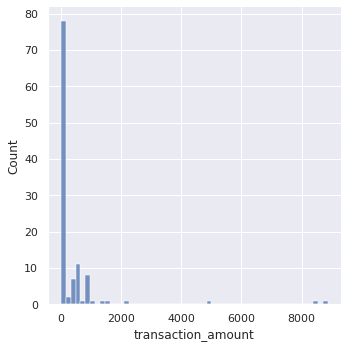

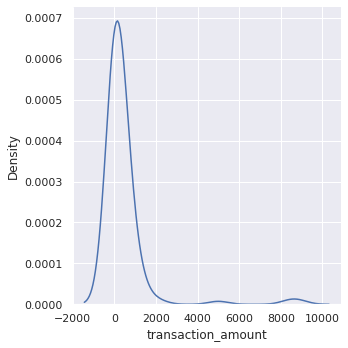

In [ ]:
#Let's look at transaction_amount histogram and kernel
sns.set(color_codes=True)

for Date in Ramp_2.columns[np.r_[8]]:
    sns.displot(data = Ramp_2, x = Date,  kind = 'hist')

#Very cool KDE explanation: https://mathisonian.github.io/kde/
for Date in Ramp_2.columns[np.r_[8]]:
    sns.displot(data = Ramp_2, x = Date,  kind = 'kde')

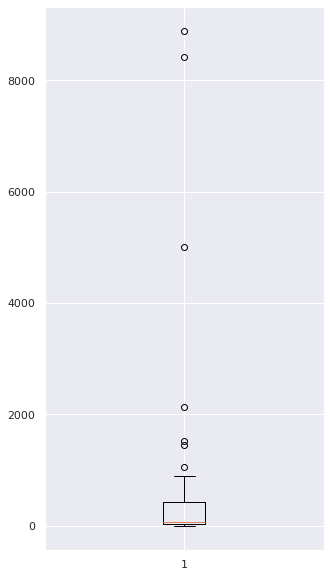

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

data = Ramp_2['transaction_amount']

fig = plt.figure(figsize =(5, 10))

# Creating plot
t=plt.boxplot(data)

# show plot
x=plt.show()

# Task 1 a)

In the text box below, provide January 31's rolling three day average and provide the link to your solution.

**Answer: January 31's rolling three day average is $682.150000**

## Aggregate hourly data to daily

In [ ]:
# First aggregate hourly data to daily (sum transaction amount at Date index)
Ramp_3 = Ramp_2.groupby(Ramp_2.Date)['transaction_amount'].sum().reset_index()
Ramp_3.head(15)

,Date,transaction_amount
0,2021-01-01,6418.20
1,2021-01-02,646.31
2,2021-01-03,54.06
3,2021-01-04,1285.16
4,2021-01-05,835.55
5,2021-01-06,444.60
6,2021-01-07,975.80
7,2021-01-08,347.40
8,2021-01-09,1033.49
9,2021-01-10,751.75


In [ ]:
Ramp_3.describe()
Ramp_3.info()

,transaction_amount
count,31.000000
mean,1589.220323
std,2490.239719
min,54.060000
25%,408.680000
50%,751.750000
75%,1256.040000
max,10458.580000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                31 non-null     datetime64[ns]
 1   transaction_amount  31 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 624.0 bytes


## Box Plot

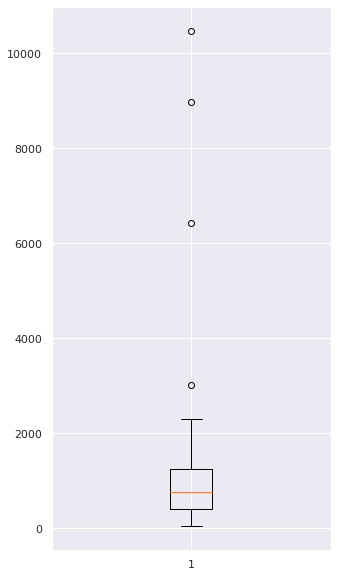

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

data = Ramp_3['transaction_amount']

fig = plt.figure(figsize =(5, 10))

# Creating plot
t=plt.boxplot(data)

# show plot
x=plt.show()

## Rolling Aggregate [window function]

In [ ]:
# First sort
Ramp_3.sort_values(by='Date')

,Date,transaction_amount
0,2021-01-01,6418.20
1,2021-01-02,646.31
2,2021-01-03,54.06
3,2021-01-04,1285.16
4,2021-01-05,835.55
5,2021-01-06,444.60
6,2021-01-07,975.80
7,2021-01-08,347.40
8,2021-01-09,1033.49
9,2021-01-10,751.75


In [ ]:
#Rolling Aggregate [window function]
Ramp_3['3_day_Average'] = Ramp_3['transaction_amount'].rolling(3).mean()
Ramp_3.head(40)

,Date,transaction_amount,3_day_Average
0,2021-01-01,6418.20,NaN
1,2021-01-02,646.31,NaN
2,2021-01-03,54.06,2372.856667
3,2021-01-04,1285.16,661.843333
4,2021-01-05,835.55,724.923333
5,2021-01-06,444.60,855.103333
6,2021-01-07,975.80,751.983333
7,2021-01-08,347.40,589.266667
8,2021-01-09,1033.49,785.563333
9,2021-01-10,751.75,710.880000


## Plot Hourly/Daily Transaction Amount

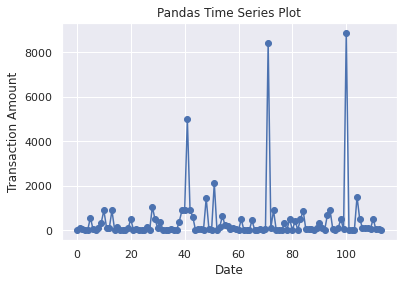

In [ ]:
# Import Library
import matplotlib.pyplot as plt

# Plot
d=plt.plot(Ramp_2["transaction_amount"], marker='o')

# Labelling

a=plt.xlabel("Date")
b=plt.ylabel("Transaction Amount")
c=plt.title("Pandas Time Series Plot")

# Display

t=plt.show()

## Plot Daily Transaction Amount

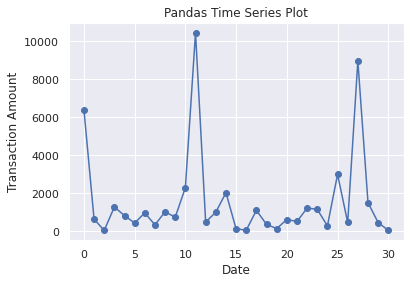

In [ ]:
# Import Library

import matplotlib.pyplot as plt

# Plot
d=plt.plot(Ramp_3["transaction_amount"], marker='o')

# Labelling

a=plt.xlabel("Date")
b=plt.ylabel("Transaction Amount")
c=plt.title("Pandas Time Series Plot")

# Display

t=plt.show()

## Plot Daily 3 day Average Transaction Amount

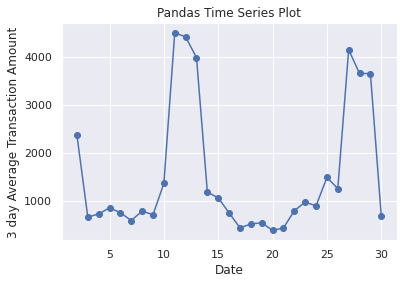

In [ ]:
# Import Library

import matplotlib.pyplot as plt

# Plot
d=plt.plot(Ramp_3["3_day_Average"], marker='o')

# Labelling

a=plt.xlabel("Date")
b=plt.ylabel("3 day Average Transaction Amount")
c=plt.title("Pandas Time Series Plot")

# Display

t=plt.show()


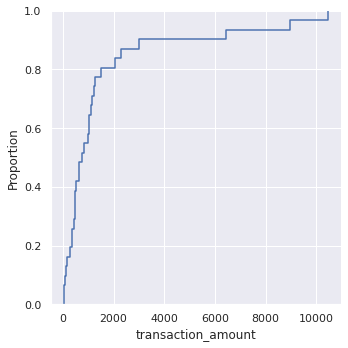

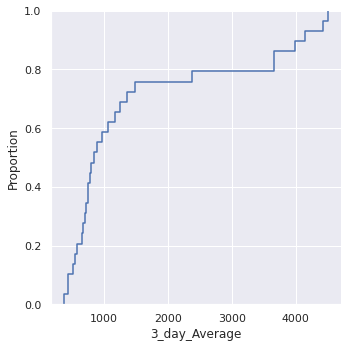

In [ ]:
sns.set(color_codes=True)

for Date in Ramp_3.columns[np.r_[1,2:3]]:
    a=sns.displot(data = Ramp_3, x = Date,  kind = 'ecdf')

# Task 1 b)
Using this dataset, show the SQL query to find the rolling 3 day average transaction amount for each day in January 2021.

Following would be what I run in SQL after creating correcttly aggregated daily data and after formatting time stamp as I did in Python under Task 1 a).

**Query #1**

    select *,
      avg(transaction_amount) OVER(ORDER BY Date
         ROWS BETWEEN 2 PRECEDING AND CURRENT ROW )
         as rolling_3_day_average
    from transactions;

# Task 2

What approach would you take to building a strategy to prevent account takeover fraud?

Please list examples of:
>   * data you would use,
>   * what treatments you would apply,
>   * key metrics you would monitor,

## Recommendation:


My approach would be analytical and based in industry best practices developed in transaction monitoring fields (similar to AML, CTRs) used as a starting point to build anti-fraud rules. I would setup rule-based models that would flag susspicious transactions based on features like:
* Change in behavior (amounts spent/depositied, withdrawn, frequency, recency)
* Dormant accounts (monitor when dormant account becomes active)
* Exact amount (track if dollar amounts that move from account to account are of an exact amount)
* Round amount (track if dollar amounts that move from account to account are of round amount, and flag unlikely population)
* International activity flagging and so on (some supporting resource: https://fiubelize.org/types-of-suspicious-activities-or-transactions/)

The data that I would use needs to reflect important customer features linked to account and information that changed suddenly:
*	new devices, cookies and locations,
*	customer’s email address, phone number, or home address associated with their bank account, credit card account, ecommerce account, or loyalty account
*	features created from transaction monitoring, especially any type of rates (% of daily, monthly transaction count, amount)

If the data allows, I would build some type of machine learning model which would allow to calculate the probability of a customer having higher risk to be exposed to the account take over. The most effective machine learning models use Weight of evidence (WOE) and Information value (IV) to perform variable transformation and selection.

## Sample PD scorecard techique, also applicable to risk scoring

This Colab was developed by me, where I gathered best practices through the research and analysis and applied it to simple bank loan data for the purpose of exploration of PD scorecard modeling best practices.
https://colab.research.google.com/drive/1lShfIb3gj4kQYNwTIo11roA26H1q6CT_?usp=sharing

## Creating feature (rate)

I used the forked data provided to show that it is possible to create additional features and visualize it.


In [ ]:
# Add a counter to daily data to count daily transaction frequency
Ramp_2['counter'] = 1
Ramp_2.head()

,DateTime,Date,Year,Month,Day,Hour,Minute,Second,transaction_amount,counter
0,2021-01-16 00:00:00,2021-01-16,2021,1,16,0,5,54,25.05,1
1,2021-01-07 20:00:00,2021-01-07,2021,1,7,20,53,4,124.00,1
2,2021-01-18 22:00:00,2021-01-18,2021,1,18,22,55,37,66.58,1
3,2021-01-21 00:00:00,2021-01-21,2021,1,21,0,36,57,9.99,1
4,2021-01-19 06:00:00,2021-01-19,2021,1,19,6,31,10,22.27,1


In [ ]:
#I would like to view the data by variable Date. I am interested in Transaction Frequency Rate over time.

TansbyDate = pd.concat([Ramp_2.groupby("Date")["counter"].sum(),Ramp_2.groupby("Date")["transaction_amount"].sum()],axis=1)
TansbyDate.columns = ["Frequency","DailyTransactionAmounts"]
TansbyDate["DailyTransactionAmoutRate"] = TansbyDate.Frequency/TansbyDate.DailyTransactionAmounts
TansbyDate.sort_values("Date")

,Frequency,DailyTransactionAmounts,DailyTransactionAmoutRate
Date,,,
2021-01-01,3,6418.20,0.000467
2021-01-02,3,646.31,0.004642
2021-01-03,3,54.06,0.055494
2021-01-04,4,1285.16,0.003112
2021-01-05,4,835.55,0.004787
2021-01-06,4,444.60,0.008997
2021-01-07,4,975.80,0.004099
2021-01-08,4,347.40,0.011514
2021-01-09,3,1033.49,0.002903


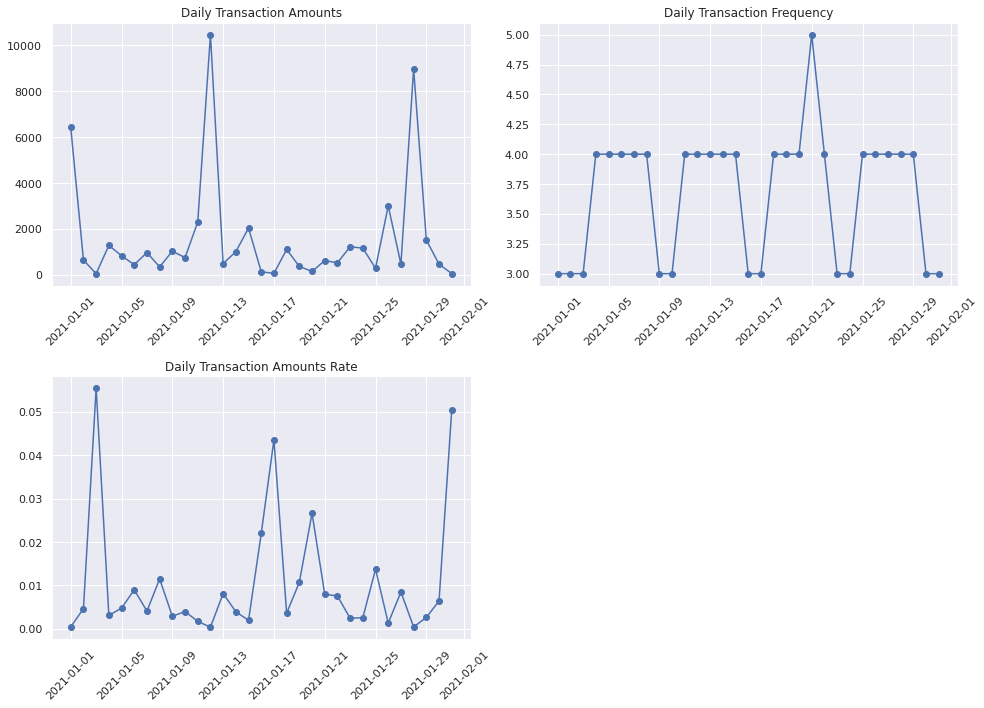

In [ ]:
fig = plt.figure(figsize=(20,10))

x = TansbyDate["Frequency"]
y = TansbyDate["DailyTransactionAmounts"]
z = TansbyDate["DailyTransactionAmoutRate"]

#  subplot #1
a=plt.subplot(233)
a=plt.title('Daily Transaction Frequency')
a=plt.plot(x, marker='o')
e=plt.xticks(rotation=45)
f=plt.grid(True)


#  subplot #2
a=plt.subplot(232)
a=plt.title('Daily Transaction Amounts')
c=plt.plot(y, marker='o')
e=plt.xticks(rotation=45)
f=plt.grid(True)


#  subplot #3
a=plt.subplot(235)
a=plt.title('Daily Transaction Amounts Rate')
c=plt.plot(z, marker='o')
e=plt.xticks(rotation=45)
f=plt.grid(True)

plt.tight_layout()
plt.show()